<a class="anchor" id="0"></a>
# **Bayes Classifier**


In this Notebook, we use a Bayesian classification algorithm on a personal database to predict whether an individual's annual income exceeds $50,000 based on personal characteristics.


## 

In [1]:
import os
import pandas as pd
def read_csv_space(path, file):
    return pd.read_csv(os.path.join(path, file), encoding='', sep='\s+', index_col=False, engine='python') 

def read_csv_comma(path, file):
    return pd.read_csv(os.path.join(path, file), encoding='', sep=',', engine='python') 

## Load Data

In [2]:
path = "/kaggle/input/adult-dataset"
file = "adult.csv"
df = read_csv_comma(path,file)

## ** Exploratory data analysis** <a class="anchor" id="7"></a>



In [3]:
# view dimensions of dataset

df.shape

(32560, 15)

#### Define Features

In [4]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [5]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Overall Info of the data

In [6]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education_num     32560 non-null int64
marital_status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital_gain      32560 non-null int64
capital_loss      32560 non-null int64
hours_per_week    32560 non-null int64
native_country    32560 non-null object
income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Check data type
In actual data analysis, the data we use contains categorical variables. These variables are encoded as characters rather than numeric values. For example, the encoding for the gender variable is usually "male" and "female". Before analysis, it is necessary to clean up such variables and convert them into numerical form. Below, we will first automatically identify the categorical feature variables from all the feature variables.

In [7]:
# find categorical variables
categorical = df.columns[df.dtypes == 'object']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


In [8]:
# view the categorical variables

df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


### Summary 

- Category variables include workclass、education、marital_status、occupation、relationship、race、sex、native_country, and income
- income is the traget variable


### Check missing

In [9]:
# check missing values in categorical variables

df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

### Summarize frequences of unique values of category variables




In [10]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [11]:
# view frequency distribution of categorical variables
import numpy as np
for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

 Private             0.697052
 Self-emp-not-inc    0.078041
 Local-gov           0.064281
 ?                   0.056388
 State-gov           0.039834
 Self-emp-inc        0.034275
 Federal-gov         0.029484
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322512
 Some-college    0.223925
 Bachelors       0.164435
 Masters         0.052918
 Assoc-voc       0.042445
 11th            0.036087
 Assoc-acdm      0.032770
 10th            0.028655
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013299
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459951
 Never-married            0.328071
 Divorced                 0.136456
 Separated                0.031480
 Widowed                  0.030498
 Married-spouse-absent    0.012838
 Married-AF-spouse        0.000706
Name:

#### Unusual encoding for missing
Now, we can see that there are several variables, such as workclass, occupation, and native_country, which contain missing values. Typically, missing values are encoded as NaN, and Python would detect them using the regular command df.isnull().sum().

However, in this case, the missing values are encoded as '?'. Python cannot detect these as missing values because it does not recognize '?' as a missing value. Therefore, we must replace '?' with NaN, so that Python can detect these missing values.

Next, we will perform the replacement for each categorical variable.Now, we can see that there are several variables, such as workclass, occupation, and native_country, which contain missing values. Typically, missing values are encoded as NaN, and Python would detect them using the regular command df.isnull().sum().

### workclass 

In [12]:
# check labels in workclass variable

df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [13]:
# check frequency distribution of values in workclass variable

df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [14]:
# replace '?' values in workclass variable with `NaN`
df['workclass'].replace(' ?', np.NaN, inplace=True)

In [15]:
# again check the frequency distribution of values in workclass variable

df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

### occupation variable

In [16]:
# check labels in occupation variable

df.occupation.unique()


array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [17]:
# check frequency distribution of values in occupation variable

df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [18]:
# replace '?' values in occupation variable with `NaN`

df['occupation'].replace(' ?', np.NaN, inplace=True)


In [19]:
# again check the frequency distribution of values in occupation variable

df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

### native_country variable


In [20]:
# check labels in native_country variable

df.native_country.unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [21]:
# check frequency distribution of values in native_country variable

df.native_country.value_counts()


 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [22]:
# replace '?' values in native_country variable with `NaN`

df['native_country'].replace(' ?', np.NaN, inplace=True)

In [23]:
# again check the frequency distribution of values in native_country variable

df.native_country.value_counts()

 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

### Check one more time

In [24]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

### Too many category values

The standard treatment for categorical variables is to create corresponding dummy variables. If a variable contains n categories, we typically create n−1 dummy variables. When n is large, this method can lead to an excessive number of feature variables.

In [25]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In the "native_country" variable, there are 42 categories. When the amount of data is relatively small, it is necessary to aggregate the categories to some extent when creating dummy variables from such a variable.In the "native_country" variable, there are 42 categories. When the amount of data is relatively small, it is necessary to aggregate the categories to some extent when creating dummy variables from such a variable.

### Handeling missing

- a typical way is to drop observations with N.A.
- another way is imputation, imputed by the most likely value.

In [26]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native_country'].fillna(df['native_country'].mode()[0], inplace=True)    

### one-hot encoding for categories

In [27]:
import category_encoders as ce
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

df_copy = encoder.fit_transform(df)


In [28]:
df_copy.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,income
0,50,1,0,0,0,0,0,0,0,83311,...,0,0,0,0,0,0,0,0,0,<=50K
1,38,0,1,0,0,0,0,0,0,215646,...,0,0,0,0,0,0,0,0,0,<=50K
2,53,0,1,0,0,0,0,0,0,234721,...,0,0,0,0,0,0,0,0,0,<=50K
3,28,0,1,0,0,0,0,0,0,338409,...,0,0,0,0,0,0,0,0,0,<=50K
4,37,0,1,0,0,0,0,0,0,284582,...,0,0,0,0,0,0,0,0,0,<=50K


Once all categorical character variables have been converted into numeric dummy variable format, to preserve the original data information, we define a new dataset df_copy to store the transformed data.Once all categorical character variables have been converted into numeric dummy variable format, to preserve the original data information, we define a new dataset df_copy to store the transformed data.

### Explore numerical variables

In [29]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [30]:
# view the numerical variables

df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [31]:
df[numerical].dtypes

age               int64
fnlwgt            int64
education_num     int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
dtype: object

### check missing

In [32]:
# check missing values in numerical variables

df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

Plot empirical distributions of numerical variables

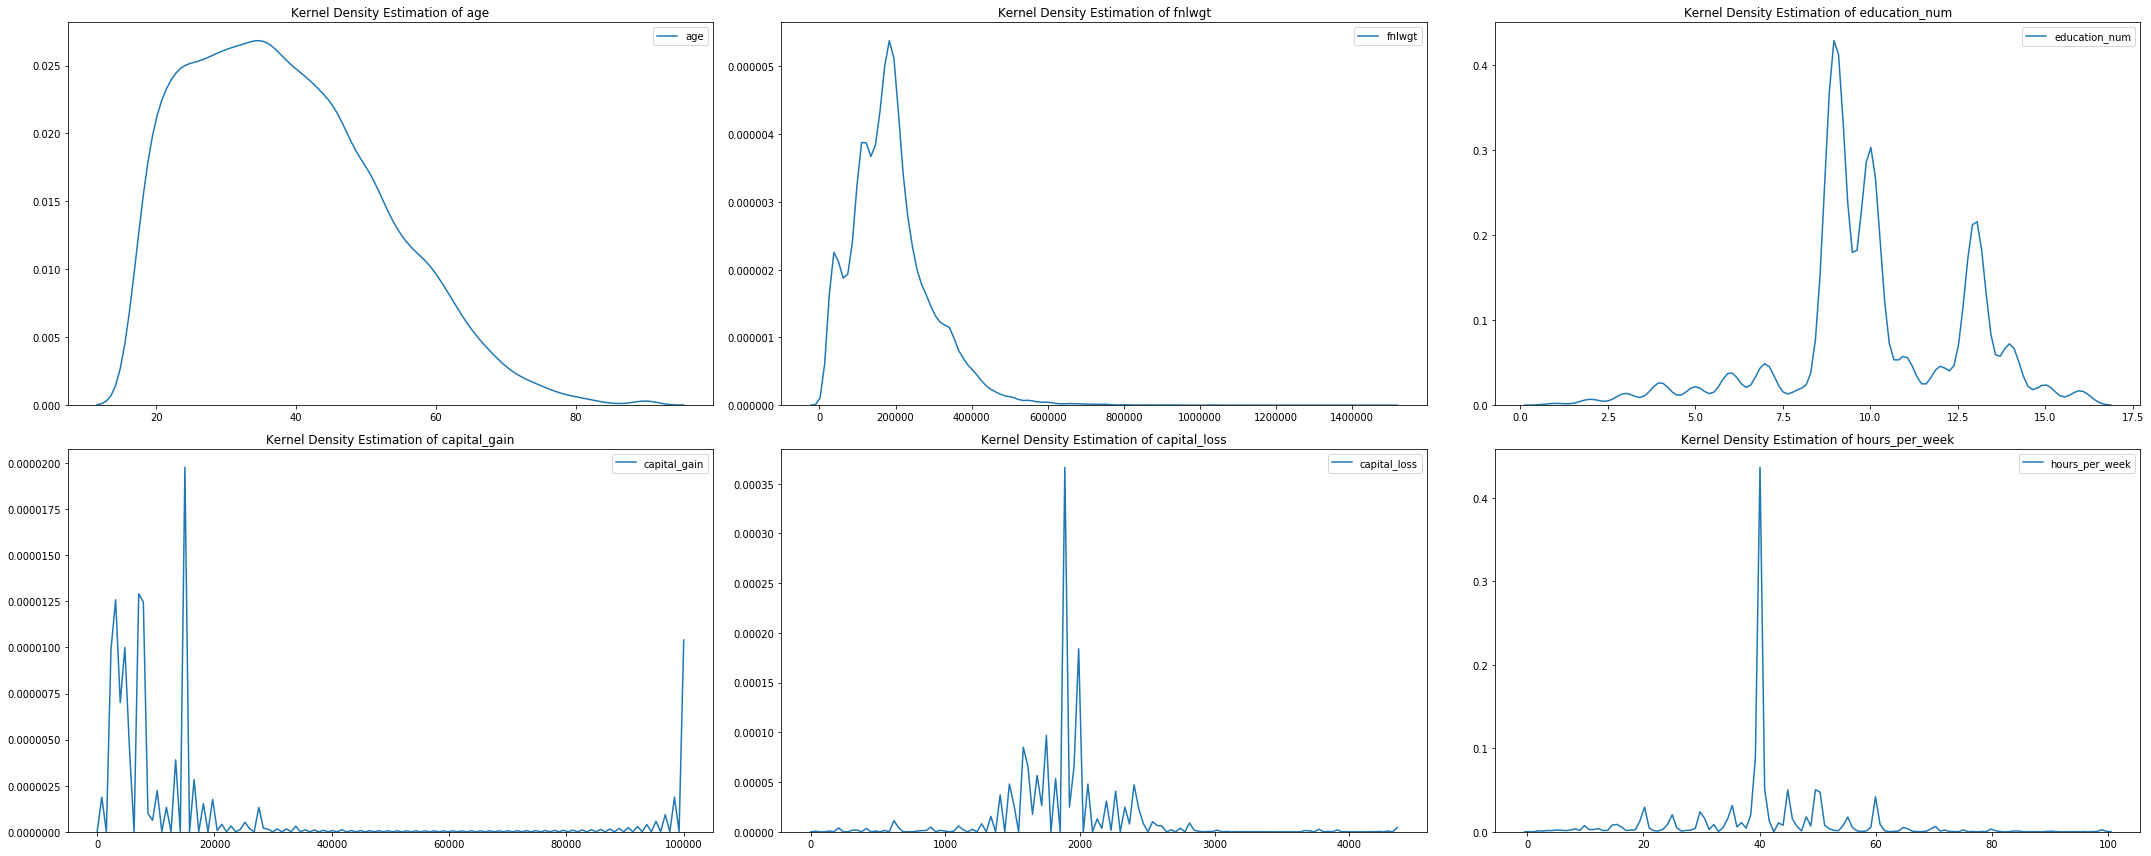

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 12))

for i in range(nrows):
    for j in range(ncols):
        col = numerical[i*ncols + j]
        sns.kdeplot(df[col], ax=axes[i][j], label=col)
        axes[i][j].set_title(f"Kernel Density Estimation of {col}")

plt.tight_layout()
plt.show()

Summary of the empirical density function:
- Most people are around 40 years old.
- fnlwgt is an index used in the US census data to reflect an individual's socioeconomic status. The average value of this index is around 200,000.
- education represents the number of years of education, with most having received 9 years of compulsory education.
- capital_gain represents investment income, with most people having low earnings and a portion of people having large earnings.
- capital_loss represents investment losses, with a relatively symmetric distribution.
- hours_per_week represents the number of working hours per week, with most people working around 40 hours, and the distribution being relatively symmetric.Most people are around 40 years old.

Based on the empirical density function, we convert numerical variables into dummy variables for the following reasons:

- To reflect non-linear classification boundaries.
- The distribution of several variables is quite concentrated. Assuming a continuous linear relationship for these variables results in too small a variation, hence the discretization.

Next, we will discretize these variables based on the sample mean.


In [34]:
for column in numerical:
    mean_val = df_copy[column].mean()
    df_copy[column + '_discrete'] = (df_copy[column] > mean_val).astype(int)

df_copy = df_copy.drop(numerical, axis=1) 

# **Bayes Classification Models <a class="anchor" id="8"></a>



- Bayes formula: $Pr(y=g|X)=P(X|y=g)Pr(y=g) $
- We first estimate $Pr(y=g)$

In [35]:
df_copy.income.value_counts(normalize='True')*100

 <=50K    75.918305
 >50K     24.081695
Name: income, dtype: float64

We the case of <=50k as 0, the case of >50k as 1, so $Pr(y=0)=0.76$, $Pr(y=1)=0.24$

As for $P(X|y=g)$, it is unknown to us and in Bayesian classification modles we impose assumptions on $P(X|y=g)$ based on the variables empirical characteristics. 

In [36]:
class_feature_means = pd.DataFrame(columns=df_copy.income.unique())
for c, rows in df_copy.groupby('income'):
    class_feature_means[c] = rows.mean()
class_feature_means

,<=50K,>50K
workclass_1,0.073506,0.092335
workclass_2,0.783931,0.657314
workclass_3,0.038189,0.045020
workclass_4,0.023828,0.047315
workclass_5,0.059711,0.078689
...,...,...
fnlwgt_discrete,0.443545,0.418824
education_num_discrete,0.241919,0.578370
capital_gain_discrete,0.038594,0.213876
capital_loss_discrete,0.030179,0.098584


In the table above, we summarize the sample mean of each feature variable in two groups of people. It can be seen that the mean of many variables differs between the two groups, such as age. This difference is the source of information recognized by the Bayesian classification model. For the Bayesian classification model to be useful, $P(X|y=g)$ must differ.

Start to build models:
- One-hot encoding of target variable


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df_copy['income'])
X = df_copy.drop(['income'], axis=1) # features 

In [38]:
print('Features include:', X.columns)
print('Number of features:', len(X.columns))

Features include: Index(['workclass_1', 'workclass_2', 'workclass_3', 'workclass_4',
       'workclass_5', 'workclass_6', 'workclass_7', 'workclass_8',
       'education_1', 'education_2',
       ...
       'native_country_38', 'native_country_39', 'native_country_40',
       'native_country_41', 'age_discrete', 'fnlwgt_discrete',
       'education_num_discrete', 'capital_gain_discrete',
       'capital_loss_discrete', 'hours_per_week_discrete'],
      dtype='object', length=105)
Number of features: 105


It can be seen that the previous categorical variables have been converted into dummy variables. Therefore, in modeling analysis, we have created 105 feature variables from the original 15 features. All these feature variables follow a 0-1 distribution.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 1)

In the following analysis, we will build several different classification models, and we will use the Average Precision (AP) to evaluate the overall precision of each model. AP is a metric that summarizes the Precision-Recall curve. Simply put, AP can be seen as a method for calculating the area under the Precision-Recall curve. As we learned in the exercise from the last session, the larger this area (closer to 1), the better. If the classification is done completely randomly, the AP is 0.5. As long as a model's AP is greater than 0.5, it is better than random partitioning.

In [40]:
from sklearn.metrics import average_precision_score

Using logistic regression as a benchmark

In [41]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver='lbfgs', max_iter=2000)
lm.fit(X_train, y_train)
y_probs = lm.predict_proba(X_test) # probability of >50k

ap = average_precision_score(y_test, y_probs[:,1])
print("The Average Precision of Logistic Regression is:", ap)

The Average Precision of Logistic Regression is: 0.7205130817898137


Now we consider different Bayesian models.

#### Naive Bayes
Assuming $P(X|y=g) = \prod_{j=1}^pP(x_j|y=g)$，and because each $x_j$ is a binary variable，we further assume that $P(x_j|y=g)$ is Bernoulli。The resulted model is Bernoulli Naive Bayes.

In [42]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
# fit the model
bnb.fit(X_train, y_train)
y_probs = bnb.predict_proba(X_test)
ap = average_precision_score(y_test, y_probs[:,1])
print("The Average Precision of Bernoulli Naive Bayes is:", ap)

The Average Precision of Bernoulli Naive Bayes is: 0.671702473019021


If we ignore the fact that each $x_j$ is binary and treat these variable as continuous，we can assume that $P(x_j|y=g)$ follow a normal distribution. The resulted model is Gaussian Naive Bayes

In [43]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_probs = gnb.predict_proba(X_test)
ap = average_precision_score(y_test, y_probs[:,1])
print("The Average Precision of Gaussian Naive Bayes is:", ap)

The Average Precision of Gaussian Naive Bayes is: 0.3506292246132583


Conditional independence assumption in Naive Bayes is a strong assumption。To relax this assumption, we can model $P(X|y=g)$ as a multivariate normal distribution as: 

$f(\mathbf{x} | y=g) = \frac{1}{(2\pi)^{k/2} |\Sigma_g|^{1/2}} e^{-\frac{1}{2} (\mathbf{x} - \mathbf{\mu_g})^T \Sigma_g^{-1} (\mathbf{x} - \mathbf{\mu_g})}$

We have LDA if assuming further $\Sigma_g = \Sigma$, and have QDA if with no this assumption

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit_transform(X_train, y_train)
y_probs = lda.predict_proba(X_test)

ap = average_precision_score(y_test, y_probs[:,1])
print("The Average Precision of LDA is:", ap)

The Average Precision of LDA is: 0.7150837191012355


/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [45]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_probs = qda.predict_proba(X_test)
ap = average_precision_score(y_test, y_probs[:,1])
print("The Average Precision of QDA is:", ap)

The Average Precision of QDA is: 0.3207437415724005


/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Bceuase of multicolinearity, we can do PCA on features first. 

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(
    StandardScaler(),     # Step1: Standardize dataset
    PCA(n_components=50), # Step2: Transform data to XX principal components
    QuadraticDiscriminantAnalysis()
)
pipeline.fit(X_train, y_train)
y_probs = pipeline.predict_proba(X_test)
ap = average_precision_score(y_test, y_probs[:,1])
print("The Average Precision of QDA is:", ap)

The Average Precision of QDA is: 0.6183052025715524


[Go to Top](#0)